In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [2]:
# setup security 
#owner: laureanofj
access_token = '1329083934-SY6gvIyJPFYuA06JhFptLNrn9kpliDfsSvPkEoY'
access_token_secret = 'NGmsO9QMIS18LUPhjHWHbxtDOow5htWk06Y37zIMO7YSl'
consumer_key = 'EC4RiP4W6PMyTdhIqf4xB9EPl'
consumer_secret = 'hmepYGOUVXHw4xCJPkBLME9cRsFMc2I3W7x8zUwHb7YgDMsXka'

# setup file store
file = '/Users/laureano.fernandes/twitter/tweets-sample-3.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [14]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 90 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['neymar', 'lukaku', 'messi', 'modric', 'mbappe','pogba','rakitic','cr7','hazard', 'kante', 'kane'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

print('**Finish**')
stream.disconnect()
listener.file_close() 

420


Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\laureano.fernandes\AppData\Local\Continuum\Anaconda3\lib\http\client.py", line 583, in _readinto_chunked
    n = self._safe_readinto(mvb)
  File "C:\Users\laureano.fernandes\AppData\Local\Continuum\Anaconda3\lib\http\client.py", line 630, in _safe_readinto
    raise IncompleteRead(bytes(mvb[0:total_bytes]), len(b))
http.client.IncompleteRead: IncompleteRead(0 bytes read, 512 more expected)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\laureano.fernandes\AppData\Local\Continuum\Anaconda3\lib\site-packages\requests\packages\urllib3\response.py", line 298, in _error_catcher
    yield
  File "C:\Users\laureano.fernandes\AppData\Local\Continuum\Anaconda3\lib\site-packages\requests\packages\urllib3\response.py", line 380, in read
    data = self._fp.read(amt)
  File "C:\Users\laureano.fernandes\AppData\Local\Continuum\Anaconda3\lib\htt

**Finish**


In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [17]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   es  RT @Futbol_TotaI: 💣BOMBAZO💣\n\nEl crack que Me...    None
1   en  RT @shannongsims: Someone created a Neymar Alp...    None
2   in                                  Lukaku lukamu jua    None
3   ht         @LeonardusAdhie Swap rak for kante? Hahaha    None
4   fr  RT @QBINZE: Trop mignooooon (trop hâte de le v...    None
5   es  RT @Futbol_TotaI: 💣BOMBAZO💣\n\nEl crack que Me...    None
6   en  @LeTour I would like to see Neymar still round...    None
7   in            even hazard pun takleh lepas dgn rlc ni    None
8   en  @wahbo_93 @442oons Well kens might, but Kane w...    None
9   ja   #ENG のHarry Kaneはhurricaneって言われてるんかな？と思ったら言われてたｗ    None


In [18]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

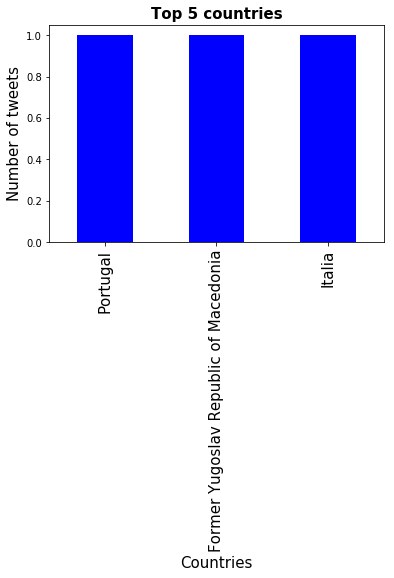

In [42]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [19]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [20]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('neymar', tweet['text']):
            players.append('neymar')
        elif word_in_text('messi', tweet['text']):
            players.append('messi')
        elif word_in_text('lukaku', tweet['text']):
            players.append('lukaku')
        elif word_in_text('modric', tweet['text']):
            players.append('modric')
        elif word_in_text('hazard', tweet['text']):
            players.append('hazard')
        elif word_in_text('mbappe', tweet['text']):
            players.append('mbappe')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('pogba', tweet['text']):
            players.append('pogba')
        elif word_in_text('rakitic', tweet['text']):
            players.append('rakitic')
        elif word_in_text('cr7', tweet['text']):
            players.append('cr7')
        elif word_in_text('kante', tweet['text']):
            players.append('kante')
        elif word_in_text('kane', tweet['text']):
            players.append('kane')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,es,RT @Futbol_TotaI: 💣BOMBAZO💣\n\nEl crack que Me...,None,messi
1,en,RT @shannongsims: Someone created a Neymar Alp...,None,neymar
2,in,Lukaku lukamu jua,None,lukaku
3,ht,@LeonardusAdhie Swap rak for kante? Hahaha,None,kante
4,fr,RT @QBINZE: Trop mignooooon (trop hâte de le v...,None,mbappe
5,es,RT @Futbol_TotaI: 💣BOMBAZO💣\n\nEl crack que Me...,None,messi
6,en,@LeTour I would like to see Neymar still round...,None,neymar
7,in,even hazard pun takleh lepas dgn rlc ni,None,hazard
8,en,"@wahbo_93 @442oons Well kens might, but Kane w...",None,kane
9,ja,#ENG のHarry Kaneはhurricaneって言われてるんかな？と思ったら言われてたｗ,None,kane


In [25]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')


In [ ]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português
